<a href="https://colab.research.google.com/github/vahid-am/AI-Projects/blob/main/Qiskit_Intro_Quantum_Programing_Deutsch%E2%80%93Jozsa_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install qiskit qiskit-aer


**Example:** Simulating the Deutsch–Jozsa algorithm to determine whether the following function is constant or balanced
$$
f : \{0,1\}^2 \to \{0,1\}, \quad
f(x_0, x_1) = (x_0 x_1) \, (x_0 \oplus x_1)
$$

In [41]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex

In [42]:
def oracle():
    qc = QuantumCircuit(5, name="Uf")

    # q0 = x0
    # q1 = x1
    # q2 = XOR workspace
    # q3 = AND workspace
    # q4 = output y

    # Step 1: Compute XOR into q2
    qc.cx(0, 2)
    qc.cx(1, 2)

    # Step 2: Compute AND(x0, x1) into q3
    qc.ccx(0, 1, 3)

    # Step 3: Compute final AND into output q4
    qc.ccx(2, 3, 4)

    # Step 4: Uncompute AND workspace
    qc.ccx(0, 1, 3)

    # Step 5: Uncompute XOR workspace
    qc.cx(1, 2)
    qc.cx(0, 2)

    return qc

oracle = oracle()
oracle.draw()

q_0: ──■─────────■─────────■─────────■──
       │         │         │         │  
q_1: ──┼────■────■─────────■────■────┼──
     ┌─┴─┐┌─┴─┐  │         │  ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├──┼────■────┼──┤ X ├┤ X ├
     └───┘└───┘┌─┴─┐  │  ┌─┴─┐└───┘└───┘
q_3: ──────────┤ X ├──■──┤ X ├──────────
               └───┘┌─┴─┐└───┘          
q_4: ───────────────┤ X ├───────────────
                    └───┘

In [48]:
def deutsch_jozsa():
    qc = QuantumCircuit(5, 2)

    # Step 1: Initialize output qubit in |1>
    qc.x(4)

    # Step 2: Apply Hadamard to input qubits and output
    qc.h([0, 1, 4])

    # Step 3: Apply the oracle
    qc.append(oracle, [0, 1, 2, 3, 4])

    # Step 4: Apply Hadamard to input qubits again
    qc.h([0, 1])

    # Step 5: Measure input qubits
    qc.measure([0, 1], [0, 1])

    return qc

# Build the Deutsch-Jozsa circuit
qc = deutsch_jozsa()
qc.draw()

┌───┐     ┌─────┐┌───┐┌─┐   
q_0: ┤ H ├─────┤0    ├┤ H ├┤M├───
     ├───┤     │     │├───┤└╥┘┌─┐
q_1: ┤ H ├─────┤1    ├┤ H ├─╫─┤M├
     └───┘     │     │└───┘ ║ └╥┘
q_2: ──────────┤2 Uf ├──────╫──╫─
               │     │      ║  ║ 
q_3: ──────────┤3    ├──────╫──╫─
     ┌───┐┌───┐│     │      ║  ║ 
q_4: ┤ X ├┤ H ├┤4    ├──────╫──╫─
     └───┘└───┘└─────┘      ║  ║ 
c: 2/═══════════════════════╩══╩═
                            0  1

In [43]:
def deutsch_jozsa():

    qc = QuantumCircuit(5, 2)

    # q0,q1 = input
    # q2 = XOR workspace
    # q3 = AND workspace
    # q4 = output qubit

    # Step 1: Initialize output qubit in |1>
    qc.x(4)

    # Step 2: Apply Hadamard to input qubits and output
    qc.h(0)
    qc.h(1)
    qc.h(4)

    # --- Oracle begins ---

    # Compute XOR into q2
    qc.cx(0, 2)
    qc.cx(1, 2)

    # Compute AND(x0,x1) into q3
    qc.ccx(0, 1, 3)

    # Compute final AND into output q4
    qc.ccx(2, 3, 4)

    # Uncompute AND workspace
    qc.ccx(0, 1, 3)

    # Uncompute XOR workspace
    qc.cx(1, 2)
    qc.cx(0, 2)

    # --- Oracle ends ---

    # Step 4: Apply Hadamard to input qubits again
    qc.h(0)
    qc.h(1)

    # Step 5: Measure input qubits
    qc.measure(0, 0)
    qc.measure(1, 1)

    return qc


qc = deutsch_jozsa()
qc.draw()

┌───┐                                   ┌───┐   ┌─┐
q_0: ┤ H ├──■─────────■─────────■─────────■──┤ H ├───┤M├
     ├───┤  │         │         │         │  ├───┤┌─┐└╥┘
q_1: ┤ H ├──┼────■────■─────────■────■────┼──┤ H ├┤M├─╫─
     └───┘┌─┴─┐┌─┴─┐  │         │  ┌─┴─┐┌─┴─┐└───┘└╥┘ ║ 
q_2: ─────┤ X ├┤ X ├──┼────■────┼──┤ X ├┤ X ├──────╫──╫─
          └───┘└───┘┌─┴─┐  │  ┌─┴─┐└───┘└───┘      ║  ║ 
q_3: ───────────────┤ X ├──■──┤ X ├────────────────╫──╫─
     ┌───┐┌───┐     └───┘┌─┴─┐└───┘                ║  ║ 
q_4: ┤ X ├┤ H ├──────────┤ X ├─────────────────────╫──╫─
     └───┘└───┘          └───┘                     ║  ║ 
c: 2/══════════════════════════════════════════════╩══╩═
                                                   1  0

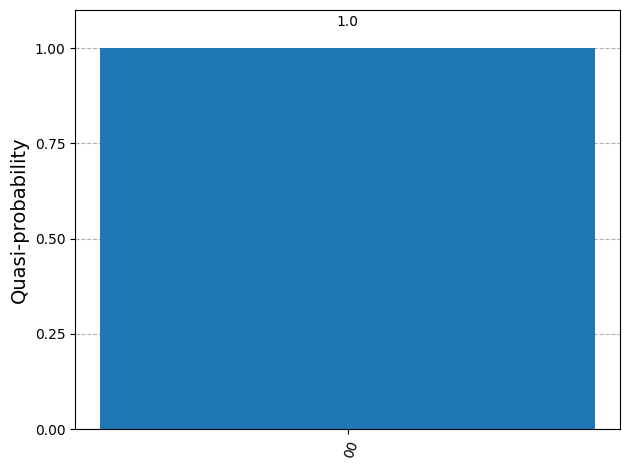

In [46]:
# Build your Deutsch–Jozsa circuit
qc = deutsch_jozsa()   # assuming your function is defined

"""
#(NOTE: To run this part, step 5 in deutsch_jozsa() must be deactivated or removed)
state = Statevector.from_instruction(qc)
display(array_to_latex(state, prefix="\\text{Statevector = }"))
display(plot_bloch_multivector(state))
# Measure input qubits
qc.measure(0, 0)
qc.measure(1, 1)
"""

# Run simulation
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1024).result()

counts = result.get_counts()

# Draw histogram
#plot_histogram(counts)

# Convert counts to probabilities
shots = sum(counts.values())
probs = {k: v / shots for k, v in counts.items()}

#Plot probabilities
plot_histogram(probs)
